In [1]:
#We have proceeded to use non-parametric tests because our data has very few observations



## power and sales
## power and ratings
## gender and sales
## gender and ratings
## gender and power


In [116]:
%matplotlib inline
import pandas as pd
import csv as csv
from numpy import *
from scipy import *
from scipy.stats import spearmanr
from scipy.stats import ttest_ind
from scipy.stats import chi2_contingency
from scipy.stats import mannwhitneyu
from matplotlib import *
import seaborn as sns

In [110]:
mergedSuperheroes = pd.read_csv("../Datasets/Production_data/Merged_Superhero.csv")
mergedSuperheroes.tail()

,Unnamed: 0,Date_Released,Publisher,Superhero_Name,Movie_Title,Rating,IMDB_Votes,Box_Office_Sales,Gender,Eye color,Race,Hair color,Height,Skin color,Alignment,Weight,rate,Inflation_Sales
26,26,2018,Marvel,Ant-Man,Ant-Man and the Wasp,71,"204,018",216648740,Male,blue,Human,Blond,211,-,good,122,0.7,218165281.2
27,27,2018,DC,Aquaman,Aquaman,72,"208,461",335061807,Male,blue,Non-Human,Blond,185,-,good,146,0.7,337407239.6
28,28,2018,Marvel,Deadpool,Deadpool 2,78,"359,880",324591735,Male,brown,Human,No Hair,188,-,neutral,95,0.7,326863877.1
29,29,2018,Marvel,Venom,Venom,68,"245,745",213515506,Male,blue,Non-Human,Strawberry Blond,191,-,bad,117,0.7,215010114.5
30,30,2019,Marvel,Captain Marvel,Captain Marvel,69,"80,858",373880366,Female,blue,Human,Blond,180,-,good,74,0.0,373880366.0


In [97]:
#mergedSuperheroes.plot.scatter("Weight","Rating")

In [25]:
#sns.lmplot(x="Weight",y="Rating",data=mergedSuperheroes,fit_reg=True)

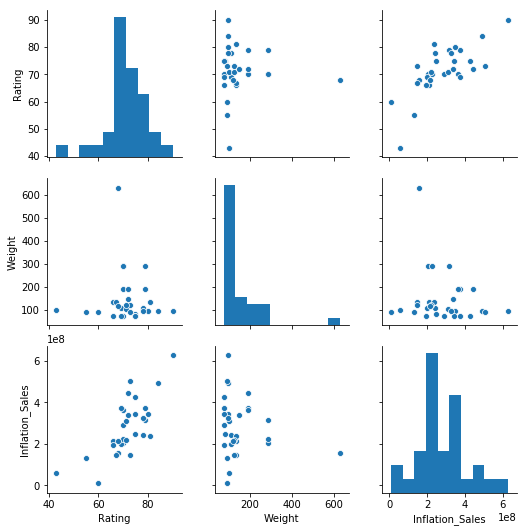

In [60]:
mergedSuperheroesComp=mergedSuperheroes[["Rating","Gender","Race","Weight","Inflation_Sales"]]

sns.pairplot(mergedSuperheroesComp)

In [61]:
rate=mergedSuperheroes["Rating"]
weight=mergedSuperheroes["Weight"]
inflation_sales=mergedSuperheroes["Inflation_Sales"]
spearmanr_coefficient, p_values=spearmanr(weight,rate)
print("rho =%0.3f and pvalue=%0.4f" %(spearmanr_coefficient,p_values))

rho =0.007 and pvalue=0.9693


In [62]:
spearmanr_coefficient, p_values=spearmanr(weight,inflation_sales)
print("rho =%0.3f and pvalue=%0.4f" %(spearmanr_coefficient,p_values))

rho =-0.155 and pvalue=0.4051


In [66]:
spearmanr_coefficient, p_values=spearmanr(rate,inflation_sales)
print("rho =%0.3f and pvalue=%0.4f" %(spearmanr_coefficient,p_values))

rho =0.708 and pvalue=0.0000


In [64]:
df=pd.crosstab(rate,weight)
chi2,p,dof,expected=chi2_contingency(df.values)
print("Test statistic =%0.3f and pvalue=%0.4f" %(chi2,p))

Test statistic =226.558 and pvalue=0.3844


In [71]:
ab=pd.crosstab(rate,inflation_sales)
chi2,p,dof,expected=chi2_contingency(ab.values)
print("Test statistic =%0.3f and pvalue=%0.4f" %(chi2,p))


Test statistic =527.000 and pvalue=0.2921


In [70]:
cd=pd.crosstab(mergedSuperheroes["Gender"],mergedSuperheroes["Race"])
chi2,p,dof,expected=chi2_contingency(cd.values)
print("Test statistic =%0.3f and pvalue=%0.4f" %(chi2,p))
cd

Test statistic =0.044 and pvalue=0.8345


Race,Human,Non-Human
Gender,,
Female,2,0
Male,23,6


In [83]:
GenderGroup=mergedSuperheroes.groupby("Gender")

In [107]:
#MaleSales=GenderGroup.()["Inflation_Sales"]
#FemaleSales=GenderGroup.[""]
#MaleSales
farai=pd.crosstab(mergedSuperheroes["Gender"],mergedSuperheroes["Inflation_Sales"])
chi2,p,dof,expected=chi2_contingency(farai.values)
print("Test statistic =%0.3f and pvalue=%0.4f" %(chi2,p))

Test statistic =31.000 and pvalue=0.4154


In [115]:
Females = mergedSuperheroes[mergedSuperheroes["Gender"]=="Female"]
Males = mergedSuperheroes[mergedSuperheroes["Gender"]=="Male"]

ttest_ind(Females["Inflation_Sales"],Males["Inflation_Sales"])

Ttest_indResult(statistic=1.305723280218138, pvalue=0.20191042394525344)